# Titanic data analysis

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

### 1.Collecting data

In [123]:
titanic_data = pd.read_csv('train.csv')

In [124]:
#number of columns
len(titanic_data.columns)

12

In [125]:
#number of rows
len(titanic_data)

891

In [126]:
titanic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [127]:
titanic_data.shape

(891, 12)

In [128]:
print('total number of passengers in the data is:', str(len(titanic_data)))

('total number of passengers in the data is:', '891')


### 2. Analysing data

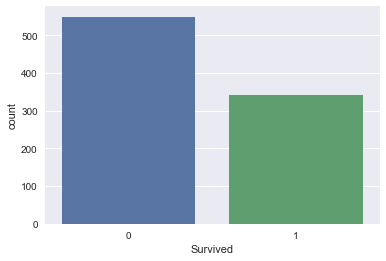

In [8]:
sns.set(style="darkgrid")
sns.countplot(x='Survived',data=titanic_data)

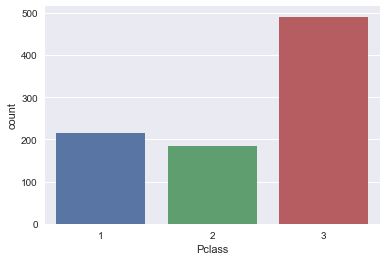

In [9]:
sns.set(style="darkgrid")
sns.countplot(x='Pclass',data=titanic_data)

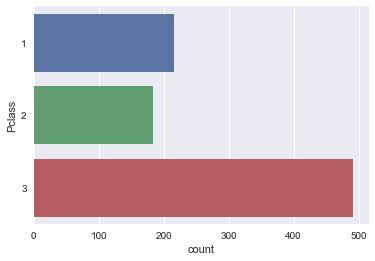

In [10]:
sns.set(style="darkgrid")
sns.countplot(y='Pclass',data=titanic_data)
#note: we changed 'x' to 'y' inside countplot parameter

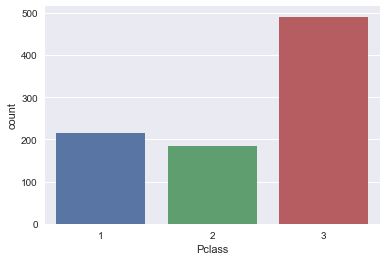

In [11]:
sns.countplot(x='Pclass',data=titanic_data)

In [12]:
titanic_data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

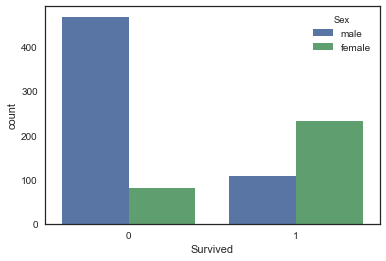

In [13]:
sns.set(style='white')
sns.countplot(data=titanic_data,x='Survived',hue='Sex')

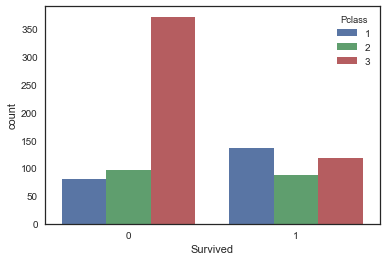

In [14]:
sns.countplot(data=titanic_data,x='Survived',hue='Pclass')
# 0 for passengers who didn't survived
# 1 for passeners who survived

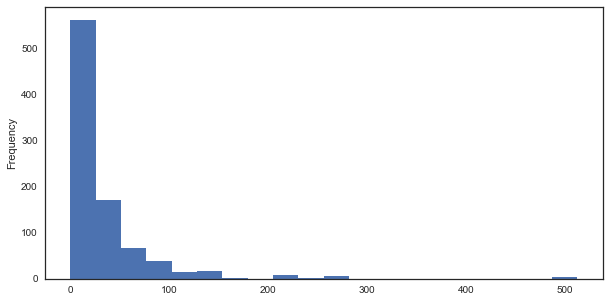

In [18]:
titanic_data['Fare'].plot.hist(figsize=(10,5),bins=20)

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


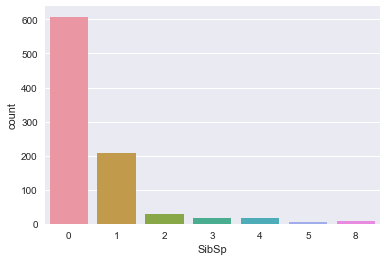

In [23]:
sns.set(style='darkgrid')
sns.countplot(data=titanic_data,x='SibSp')

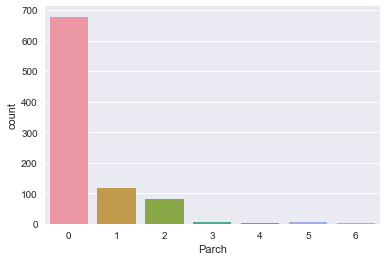

In [24]:
sns.countplot(data=titanic_data,x='Parch')

## 3. Data wrangling

In [129]:
titanic_data[['Cabin','Embarked']].head()

,Cabin,Embarked
0,NaN,S
1,C85,C
2,NaN,S
3,C123,S
4,NaN,S


In [57]:
titanic_data.loc[:,'Fare':].head()

,Fare,Cabin,Embarked
0,7.2500,NaN,S
1,71.2833,C85,C
2,7.9250,NaN,S
3,53.1000,C123,S
4,8.0500,NaN,S


In [58]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [59]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

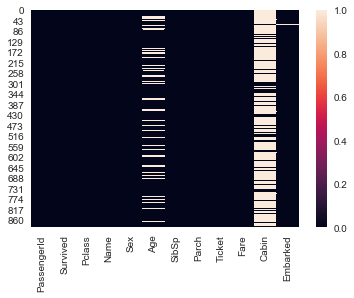

In [64]:
sns.heatmap(titanic_data.isnull())

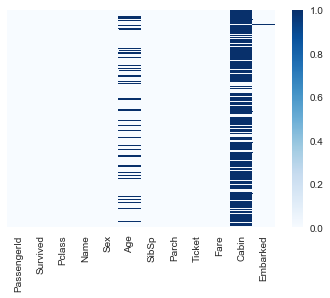

In [92]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='Blues')

TESTING heatmap

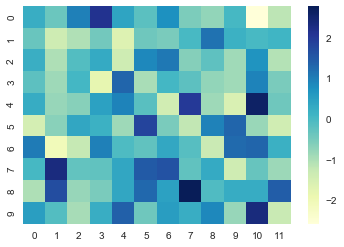

In [159]:
normal_data=np.random.randn(10,12)
sns.heatmap(normal_data,cmap="YlGnBu")

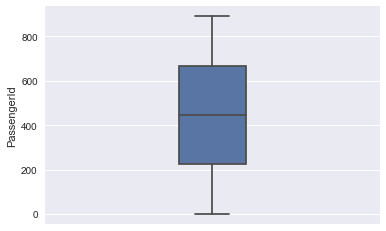

In [97]:
sns.boxplot(data=titanic_data,x='PassengerId',orient='v',width=0.2)

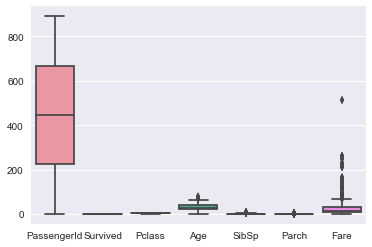

In [98]:
sns.boxplot(data=titanic_data)

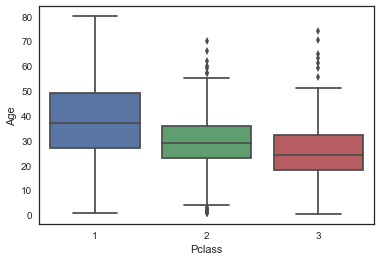

In [158]:
sns.set(style='white')
sns.boxplot(data=titanic_data,x='Pclass',y='Age')

In [131]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


testing drop command

In [132]:
df = pd.DataFrame(np.arange(12).reshape(3,4),columns=['A', 'B', 'C', 'D'])

In [133]:
df
# pd.DataFrame(np.arange(12).reshape(3,4))

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [110]:
#to drop entire row, axix=0 by default
df.drop([2])

,A,B,C,D
0,0,1,2,3
1,4,5,6,7


In [111]:
#to drop columns use axis=1
df.drop(['C'],axis=1)

,A,B,D
0,0,1,3
1,4,5,7
2,8,9,11


In [134]:
#dropping Cabin column
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [135]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [137]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [142]:
titanic_data.dropna(inplace=False,thresh=50,how='any')
#here use thresh carefully

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [145]:
titanic_data.shape

(0, 11)

In [208]:
titanic_data=pd.read_csv('train.csv')

In [209]:
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [210]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [211]:
titanic_data.dropna(inplace=True)

In [212]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

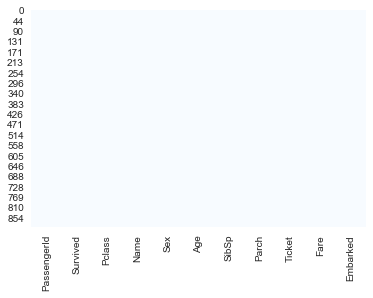

In [174]:
sns.heatmap(titanic_data.isna(),cmap='Blues',cbar=False)

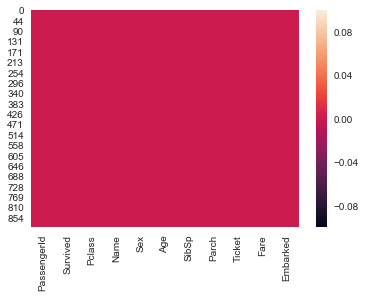

In [213]:
sns.heatmap(titanic_data.isnull())

In [214]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [215]:
pd.get_dummies(titanic_data['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [216]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [217]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [218]:
embark = pd.get_dummies(titanic_data['Embarked'])
embark.head(4)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1


In [219]:
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(4)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1


In [220]:
Pcl = pd.get_dummies(titanic_data['Pclass'])
Pcl.head(3)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1


In [221]:
Pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [222]:
titanic_data  = pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [223]:
titanic_data.head(4)
#note that last 5 columns are added in titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0


In [224]:
titanic_data.drop(['Sex','Embarked','Pclass','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [206]:
titanic_data.drop(['Name'],axis=1)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1,0,0,1,0,1


In [228]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## 4. Train and Test data

In [233]:
# x is the feature variable, independent variable
x = titanic_data.drop('Survived',axis=1)
y = titanic_data['Survived']
# y is the value you need to predict, dependent variable

In [238]:
x.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [253]:
from sklearn.cross_validation import train_test_split

In [254]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [255]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1 )

In [256]:
from sklearn.linear_model import LogisticRegression

In [257]:
logmodel = LogisticRegression()

In [258]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [265]:
predictions = logmodel.predict(x_test)

In [266]:
predictions

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [267]:
from sklearn.metrics import classification_report

In [268]:
classification_report(y_test,predictions)

u'             precision    recall  f1-score   support\n\n          0       0.81      0.83      0.82       126\n          1       0.75      0.72      0.73        88\n\navg / total       0.78      0.79      0.78       214\n'

In [270]:
from sklearn.metrics import confusion_matrix

In [271]:
confusion_matrix(y_test,predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

### using confusion matrix we can also caluclate the accuracy as follows:

accuracy = (105+63)/(105+21+25+63)

In [272]:
from sklearn.metrics import accuracy_score

In [273]:
accuracy_score(y_test,predictions)

0.7850467289719626